In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt

In [2]:
df_FaultFree = pyreadr.read_r("S:\Datasets\Falut detection data\TEP_FaultFree_Training.RData")['fault_free_training']
df_Faulty = pyreadr.read_r( "S:\Datasets\Falut detection data\TEP_Faulty_Training.RData")['faulty_training']

In [3]:
# Concatenate the fault_free and the faluty data into a single dataset 

DF = pd.concat([df_FaultFree, df_Faulty])
DF.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [4]:
summary = DF[DF['simulationRun']==1].iloc[:,3:].describe()
print(summary)

            xmeas_1       xmeas_2       xmeas_3       xmeas_4       xmeas_5  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       0.265576   3661.241419   4505.710048      9.348456     26.904955   
std        0.143596     41.840258    103.764946      0.299329      0.235383   
min       -0.003183   3470.900000   3884.300000      7.494400     25.592000   
25%        0.225830   3636.800000   4473.000000      9.269300     26.764000   
50%        0.251195   3661.250000   4506.700000      9.352200     26.897000   
75%        0.282177   3686.500000   4545.600000      9.442225     27.056000   
max        1.005200   3820.200000   5013.300000     11.157000     28.077000   

            xmeas_6       xmeas_7       xmeas_8       xmeas_9      xmeas_10  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      42.352988   2716.501076     74.965782    120.400574      0.346336   
std        0.290591     68.489751      1.200865    

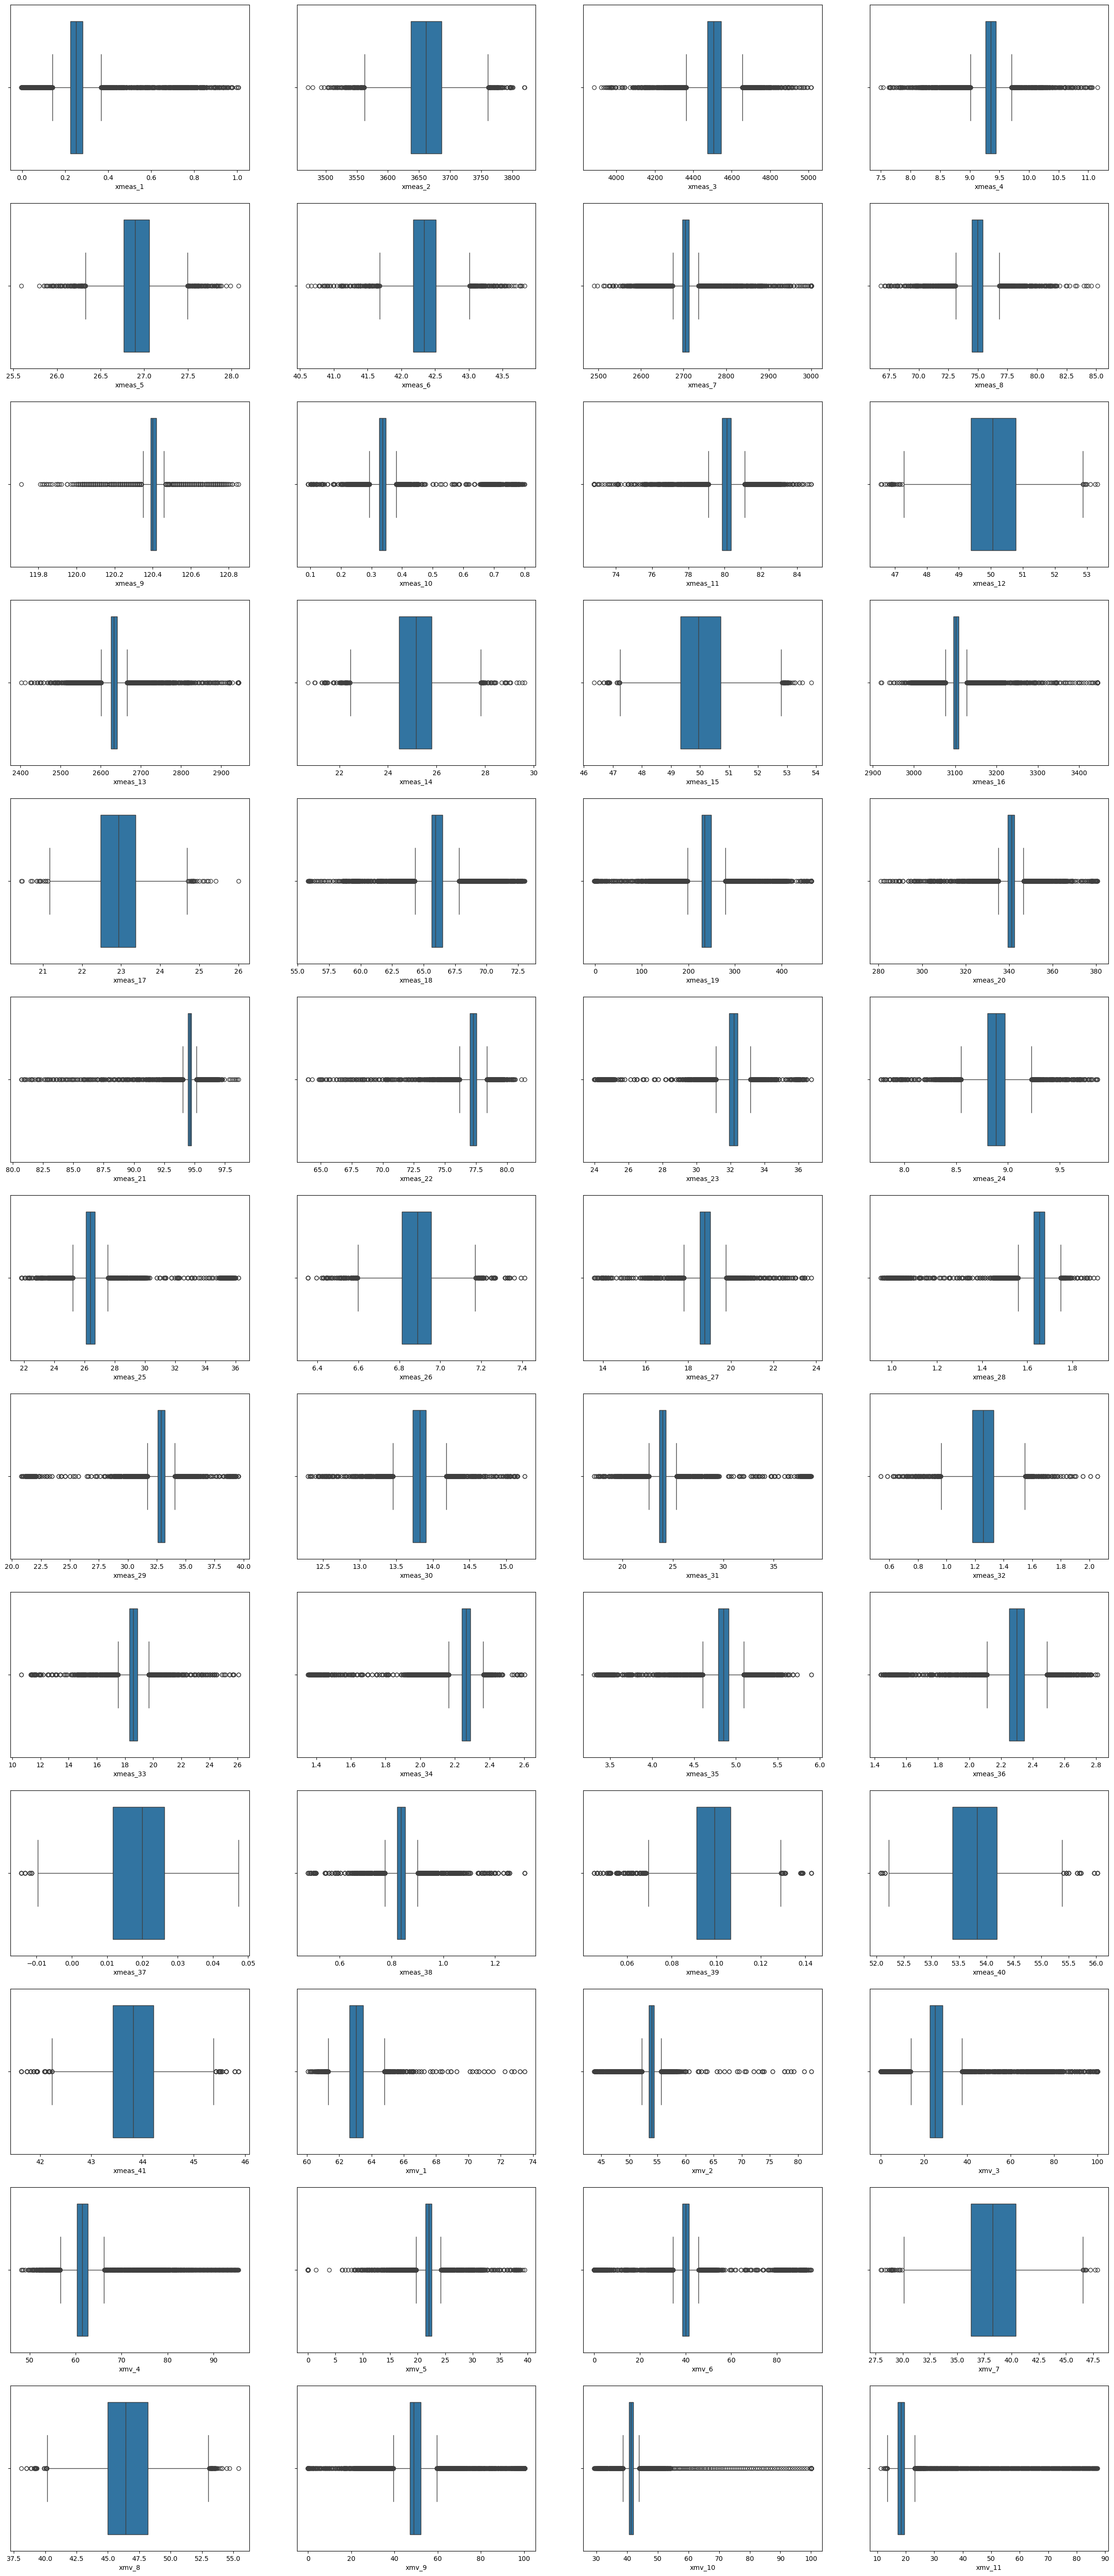

In [5]:
data = DF[DF['simulationRun']==1]

fig, ax = plt.subplots(13,4,figsize=(30,70))

for i, column in enumerate(data.columns[3:]):
    sns.boxplot(data=data, x=column, ax=ax.ravel()[i])

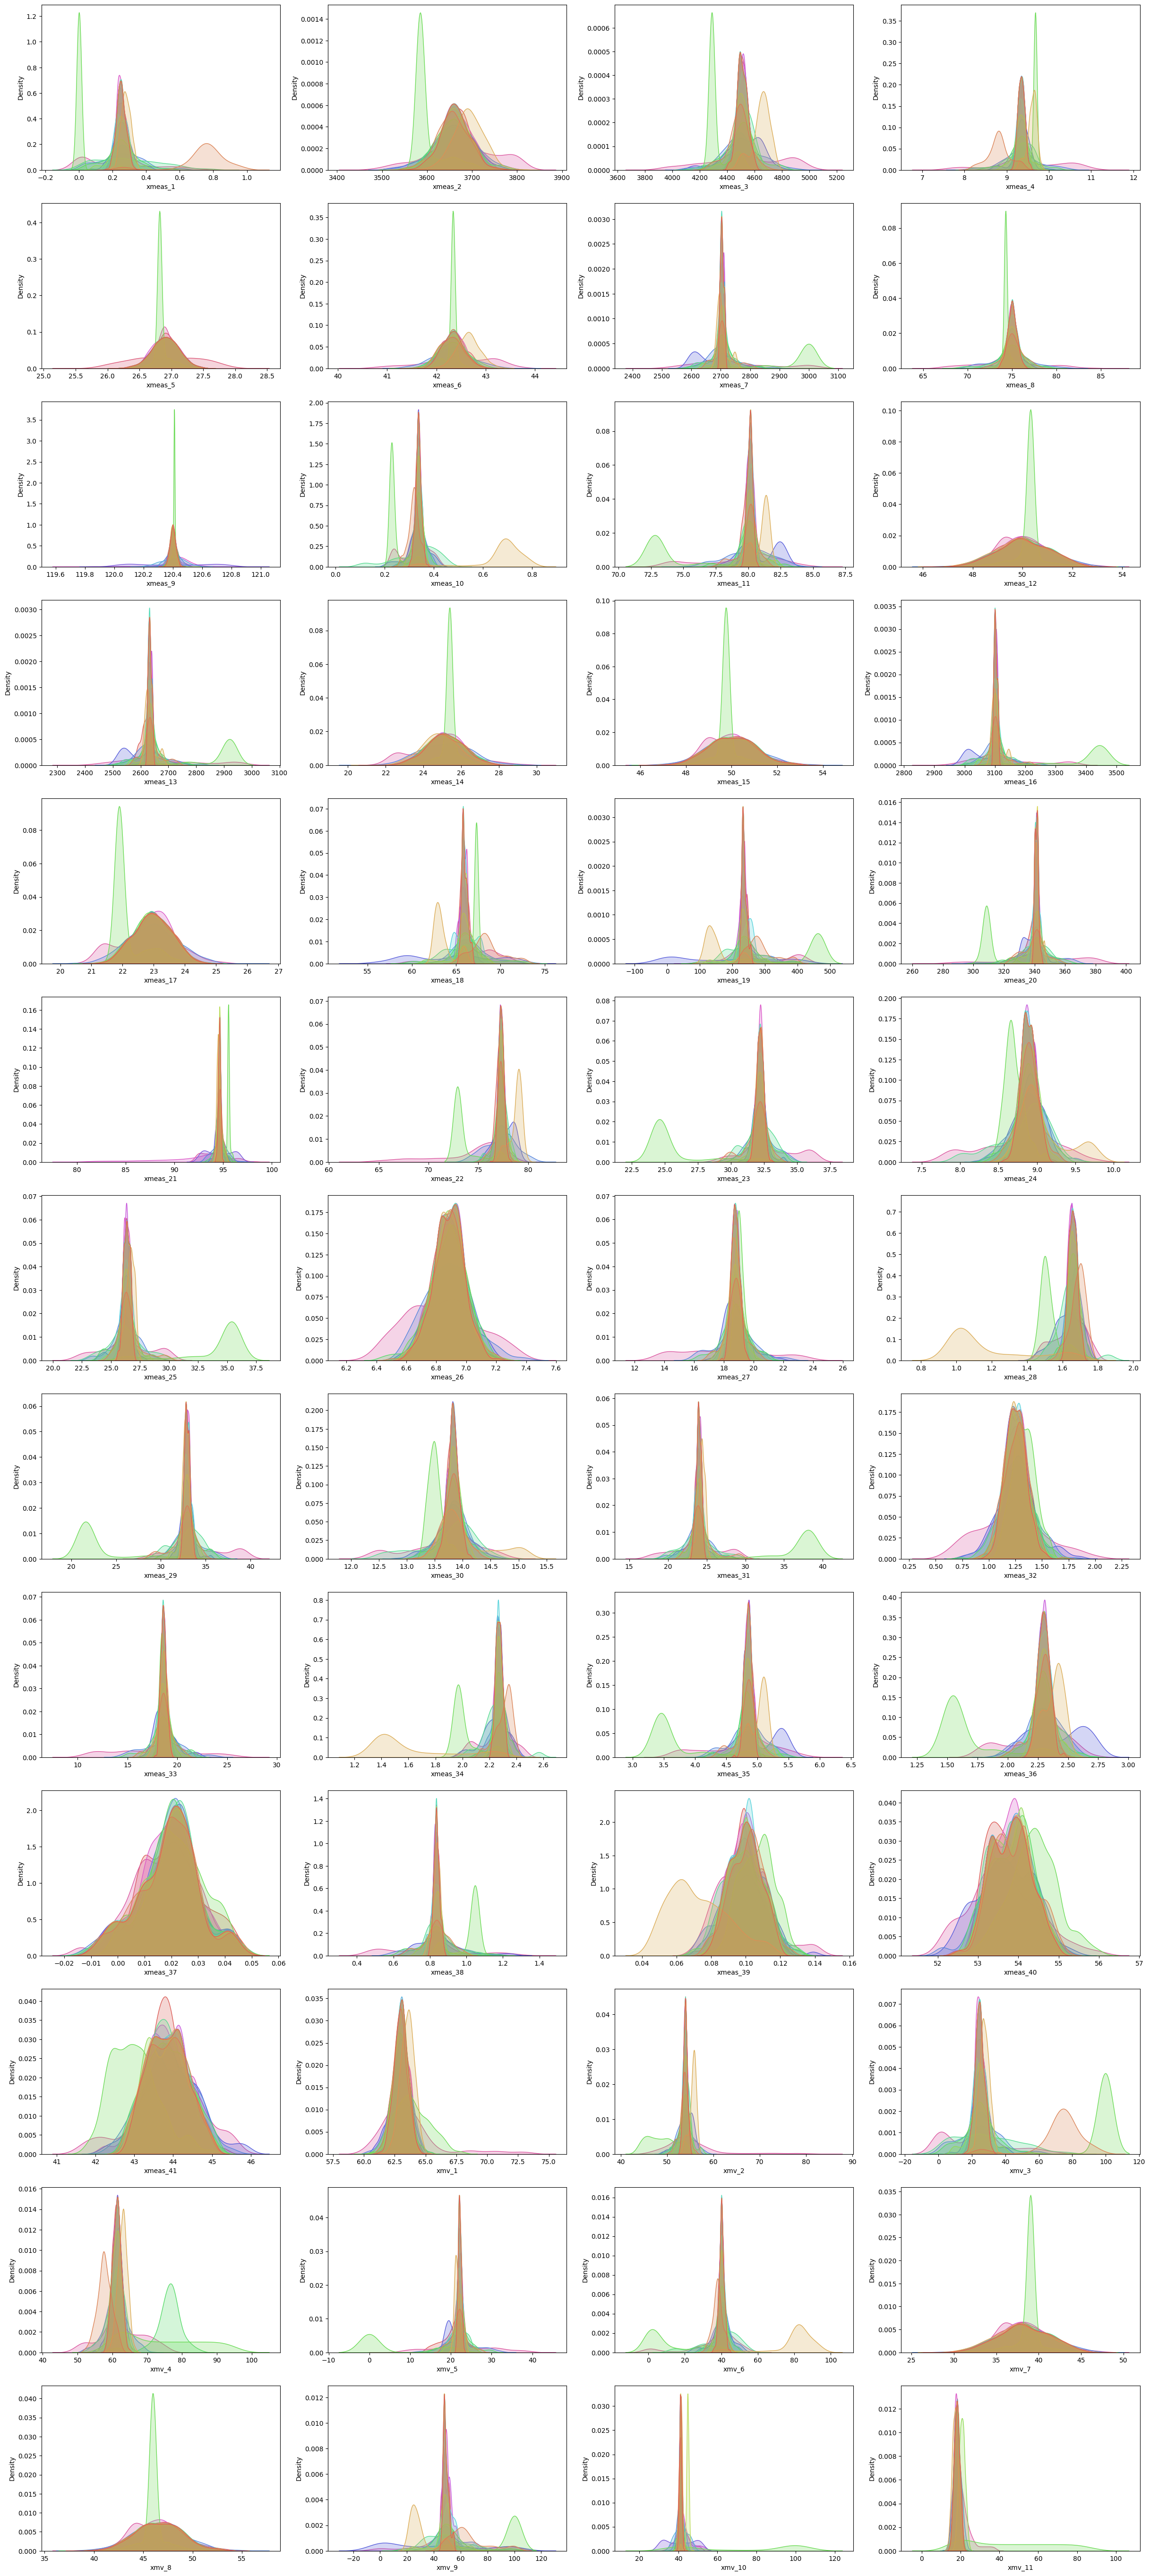

In [6]:
# KDE plot for each variable 

fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[3:]):
    sns.kdeplot(data=data, x=column, hue="faultNumber" , palette="hls" , ax=ax.ravel()[i],fill=True, legend=False)

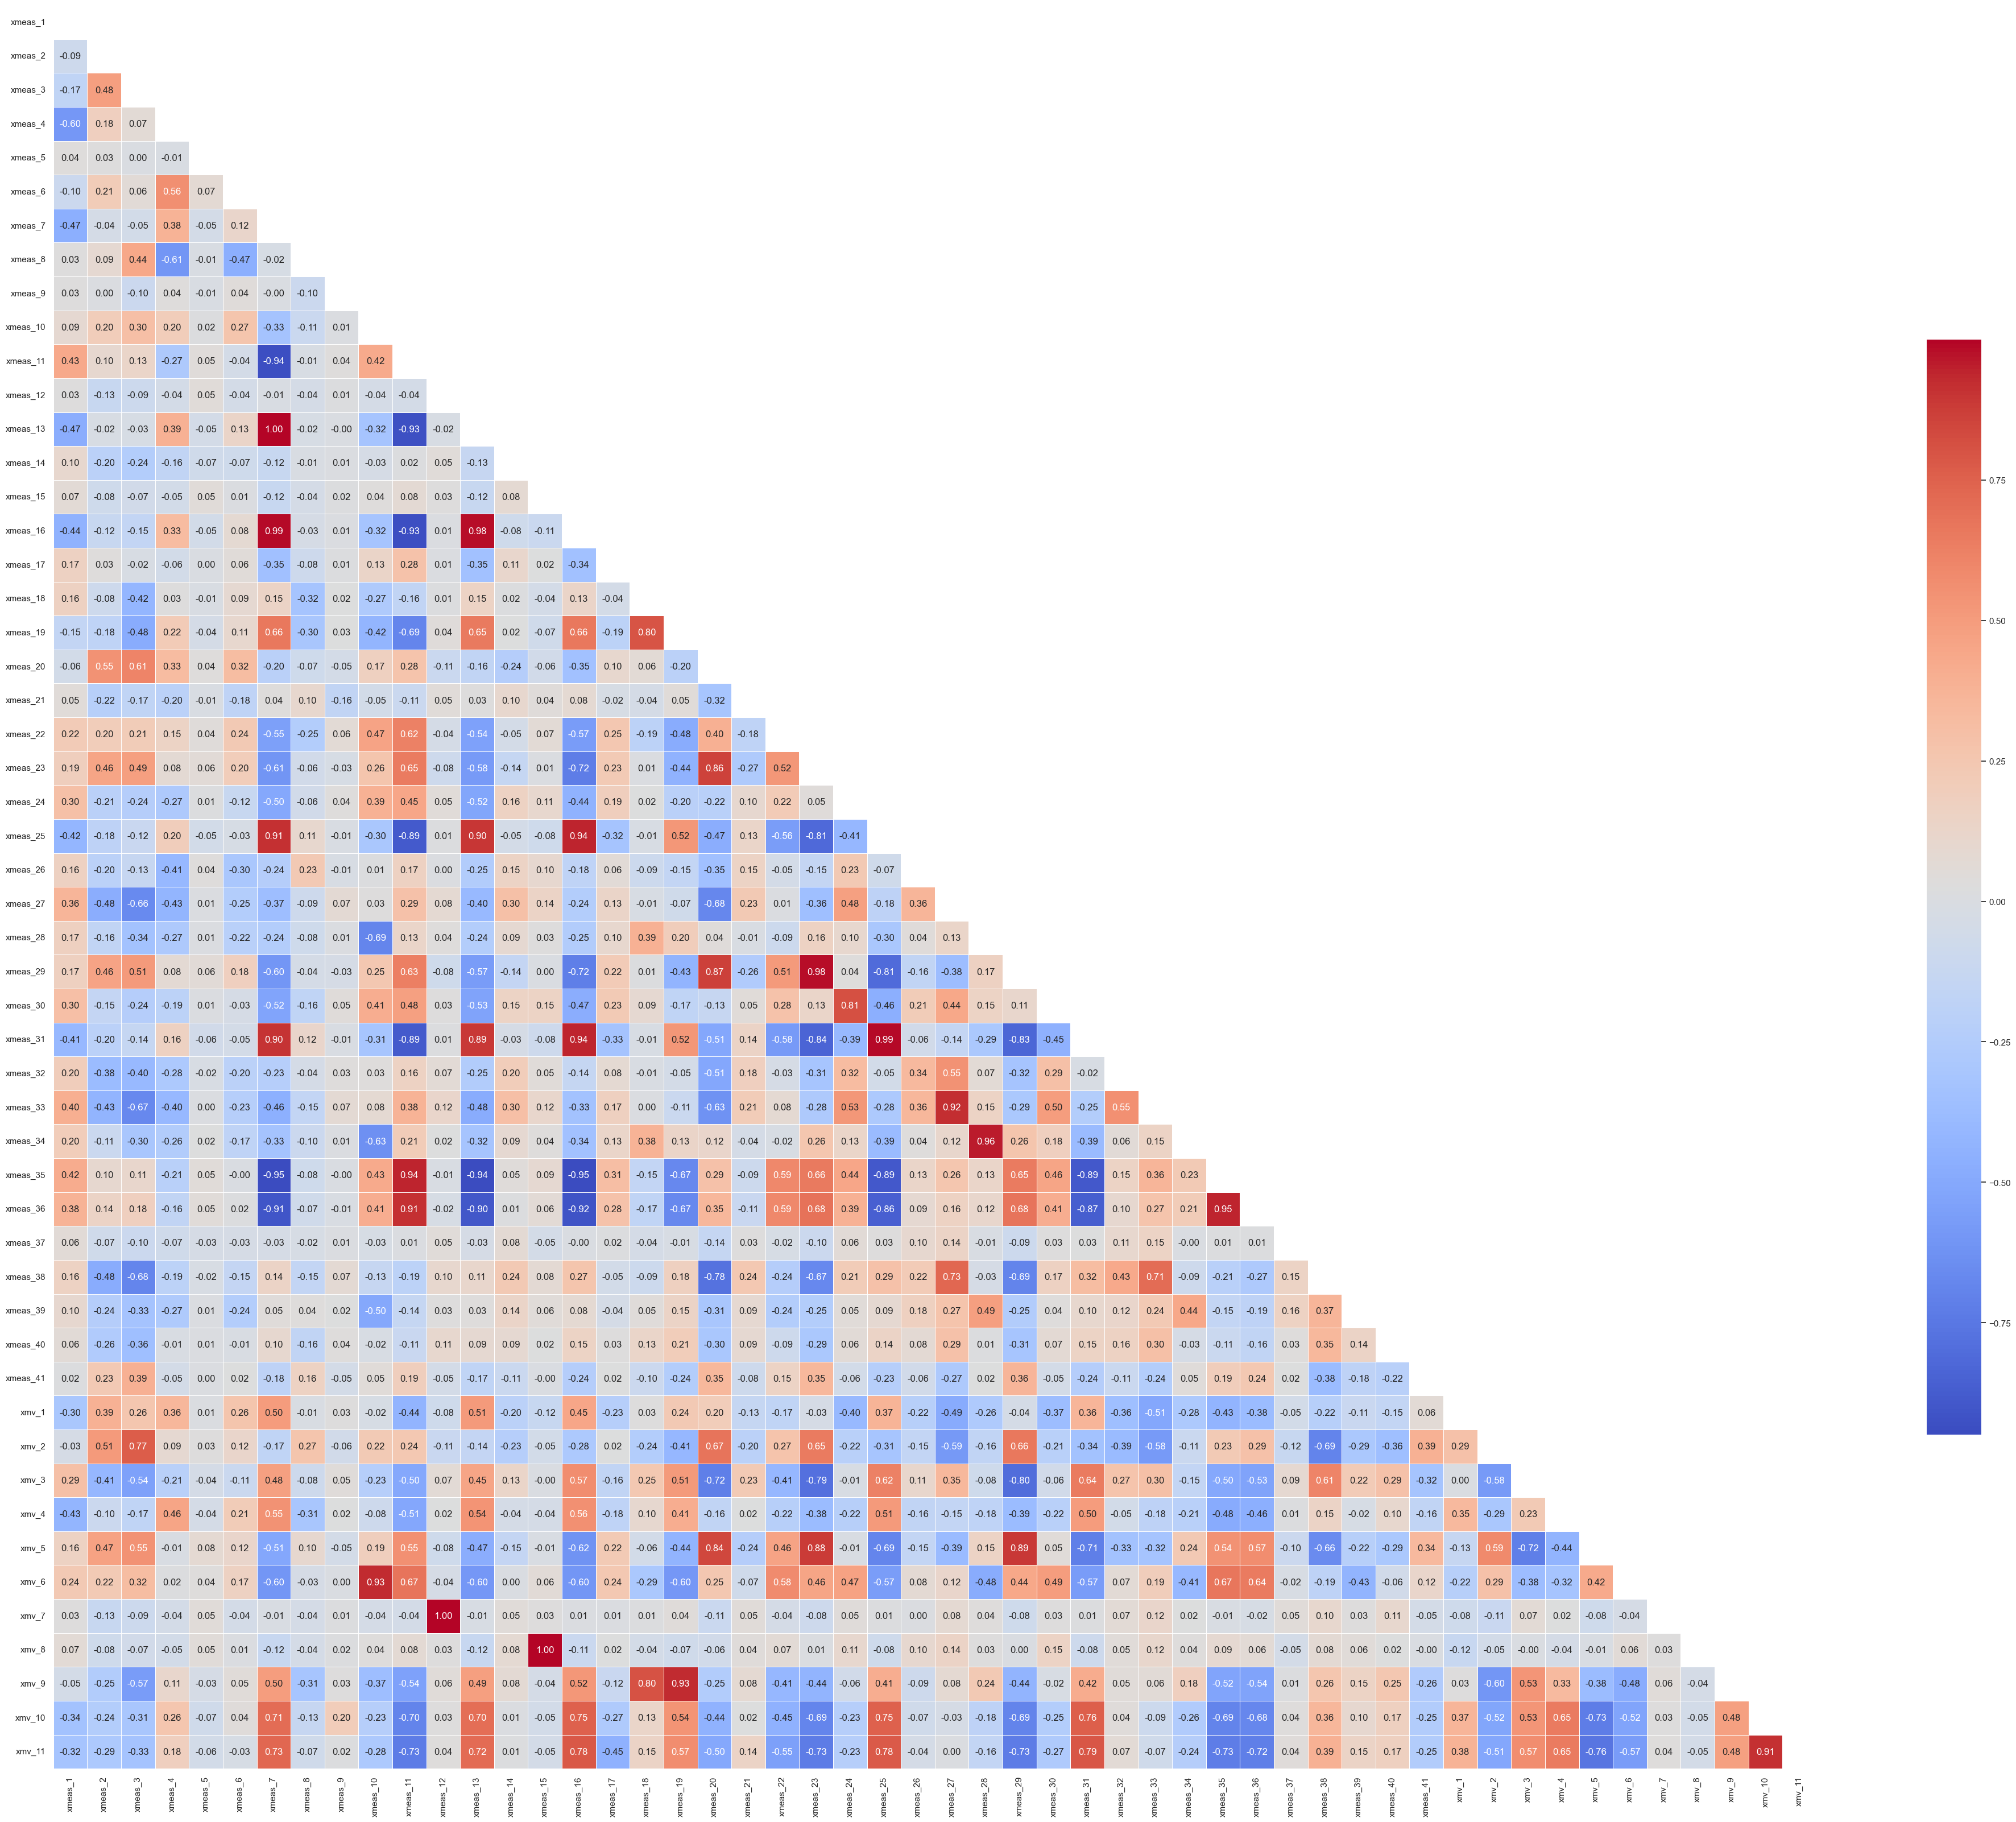

In [7]:
data = DF[DF['simulationRun']==1].iloc[:,3:]

corr = data.corr()

sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [8]:
# Calcualte the correlation matrix 

corr_matrix = data.corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(len(to_drop)); print(to_drop)

14
['xmeas_13', 'xmeas_16', 'xmeas_25', 'xmeas_29', 'xmeas_31', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_11']


In [9]:
# Drop the corelated features
data = DF[(DF['simulationRun'] >1 ) & (DF['simulationRun'] <5 ) & (DF['sample']>20)]
reduced_data = data.drop(columns=to_drop, axis=1)
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] !=9]
reduced_data = reduced_data[reduced_data['faultNumber'] !=15]

reduced_data



faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
520            0.0            2.0      21  0.26775   3630.7   4512.7   9.2949   
521            0.0            2.0      22  0.26725   3645.0   4459.4   9.2806   
522            0.0            2.0      23  0.25875   3712.7   4503.8   9.4355   
523            0.0            2.0      24  0.25368   3690.8   4512.4   9.3769   
524            0.0            2.0      25  0.24452   3637.5   4494.1   9.2725   
...            ...            ...     ...      ...      ...      ...      ...   
39995         20.0            4.0     496  0.27470   3723.2   4567.9   9.3020   
39996         20.0            4.0     497  0.21871   3678.9   4571.4   9.2438   
39997         20.0            4.0     498  0.21758   3660.6   4557.0   9.3881   
39998         20.0            4.0     499  0.22549   3673.3   4547.5   9.3404   
39999         20.0            4.0     500  0.22649   3656.3   4515.3   9.1973   

       xmeas_5  xmeas_6  xmeas_7  ...  xmeas_38  xmeas_39  xmeas_40  xmeas_41  \
520     26.917   42.466   2701.7  ...   0.84308  0.089922    52.845    43.879   
521     26.676   42.548   2704.6  ...   0.84308  0.089922    52.845    43.879   
522     26.791   42.003   2708.2  ...   0.84308  0.089922    52.845    43.879   
523     26.847   42.168   2709.4  ...   0.84308  0.089922    52.845    43.879   
524     26.962   42.451   2706.5  ...   0.84308  0.089922    52.845    43.879   
...        ...      ...      ...  ...       ...       ...       ...       ...   
39995   26.517   42.536   2721.8  ...   0.81163  0.106350    53.431    43.461   
39996   26.820   42.005   2720.3  ...   0.81163  0.106350    53.431    43.461   
39997   26.676   42.443   2716.8  ...   0.81163  0.106350    53.431    43.461   
39998   27.019   42.599   2717.9  ...   0.81163  0.106350    53.431    43.461   
39999   27.005   42.411   2716.5  ...   0.81163  0.106350    53.431    43.461   

        xmv_1   xmv_2   xmv_3   xmv_4   xmv_5  xmv_10  
520    62.838  54.111  26.634  60.788  22.682  40.947  
521    62.592  54.749  26.683  62.394  22.758  40.933  
522    63.004  54.295  24.993  59.951  22.822  41.592  
523    63.381  54.193  25.491  62.203  22.790  41.633  
524    62.087  53.604  24.069  62.409  22.490  41.209  
...       ...     ...     ...     ...     ...     ...  
39995  63.705  54.337  26.975  62.505  21.052  42.194  
39996  63.124  54.213  21.423  60.565  21.235  41.728  
39997  63.440  54.385  21.534  60.861  20.585  41.100  
39998  63.126  54.451  22.272  60.715  20.895  41.116  
39999  63.417  54.837  22.173  61.905  20.510  41.686  

[25920 rows x 41 columns]

In [10]:
#Scale the dataset 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc= MinMaxScaler()
sc.fit(reduced_data.iloc[:,3:])

MinMaxScaler()

In [11]:
reduced_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
520            0.0            2.0      21  0.26775   3630.7   4512.7   9.2949   
521            0.0            2.0      22  0.26725   3645.0   4459.4   9.2806   
522            0.0            2.0      23  0.25875   3712.7   4503.8   9.4355   
523            0.0            2.0      24  0.25368   3690.8   4512.4   9.3769   
524            0.0            2.0      25  0.24452   3637.5   4494.1   9.2725   
...            ...            ...     ...      ...      ...      ...      ...   
39995         20.0            4.0     496  0.27470   3723.2   4567.9   9.3020   
39996         20.0            4.0     497  0.21871   3678.9   4571.4   9.2438   
39997         20.0            4.0     498  0.21758   3660.6   4557.0   9.3881   
39998         20.0            4.0     499  0.22549   3673.3   4547.5   9.3404   
39999         20.0            4.0     500  0.22649   3656.3   4515.3   9.1973   

       xmeas_5  xmeas_6  xmeas_7  ...  xmeas_38  xmeas_39  xmeas_40  xmeas_41  \
520     26.917   42.466   2701.7  ...   0.84308  0.089922    52.845    43.879   
521     26.676   42.548   2704.6  ...   0.84308  0.089922    52.845    43.879   
522     26.791   42.003   2708.2  ...   0.84308  0.089922    52.845    43.879   
523     26.847   42.168   2709.4  ...   0.84308  0.089922    52.845    43.879   
524     26.962   42.451   2706.5  ...   0.84308  0.089922    52.845    43.879   
...        ...      ...      ...  ...       ...       ...       ...       ...   
39995   26.517   42.536   2721.8  ...   0.81163  0.106350    53.431    43.461   
39996   26.820   42.005   2720.3  ...   0.81163  0.106350    53.431    43.461   
39997   26.676   42.443   2716.8  ...   0.81163  0.106350    53.431    43.461   
39998   27.019   42.599   2717.9  ...   0.81163  0.106350    53.431    43.461   
39999   27.005   42.411   2716.5  ...   0.81163  0.106350    53.431    43.461   

        xmv_1   xmv_2   xmv_3   xmv_4   xmv_5  xmv_10  
520    62.838  54.111  26.634  60.788  22.682  40.947  
521    62.592  54.749  26.683  62.394  22.758  40.933  
522    63.004  54.295  24.993  59.951  22.822  41.592  
523    63.381  54.193  25.491  62.203  22.790  41.633  
524    62.087  53.604  24.069  62.409  22.490  41.209  
...       ...     ...     ...     ...     ...     ...  
39995  63.705  54.337  26.975  62.505  21.052  42.194  
39996  63.124  54.213  21.423  60.565  21.235  41.728  
39997  63.440  54.385  21.534  60.861  20.585  41.100  
39998  63.126  54.451  22.272  60.715  20.895  41.116  
39999  63.417  54.837  22.173  61.905  20.510  41.686  

[25920 rows x 41 columns]

In [12]:
X = sc.transform(reduced_data.iloc[:,3:])
Y = reduced_data['faultNumber']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_enc = le.fit_transform(Y)

In [13]:
X.shape

(25920, 38)

In [14]:
Y

520       0.0
521       0.0
522       0.0
523       0.0
524       0.0
         ... 
39995    20.0
39996    20.0
39997    20.0
39998    20.0
39999    20.0
Name: faultNumber, Length: 25920, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [16]:
y_train.shape

(20736,)

In [21]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Create an instance of each algorithm
logreg = LogisticRegression(max_iter=10000)
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
xg = xgb.XGBClassifier()

# Train the algorithms on the data
logreg.fit(x_train, y_train)
# svm.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
nb.fit(x_train, y_train)
knn.fit(x_train, y_train)
xg.fit(x_train, y_train)
 
# Use the trained models to make predictions on new data
y_pred_logreg =logreg.predict(x_test)
# y_pred_svm = svm.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_xg = xg.predict(x_test)


PLOTTING THE CONFUSION MATRIX


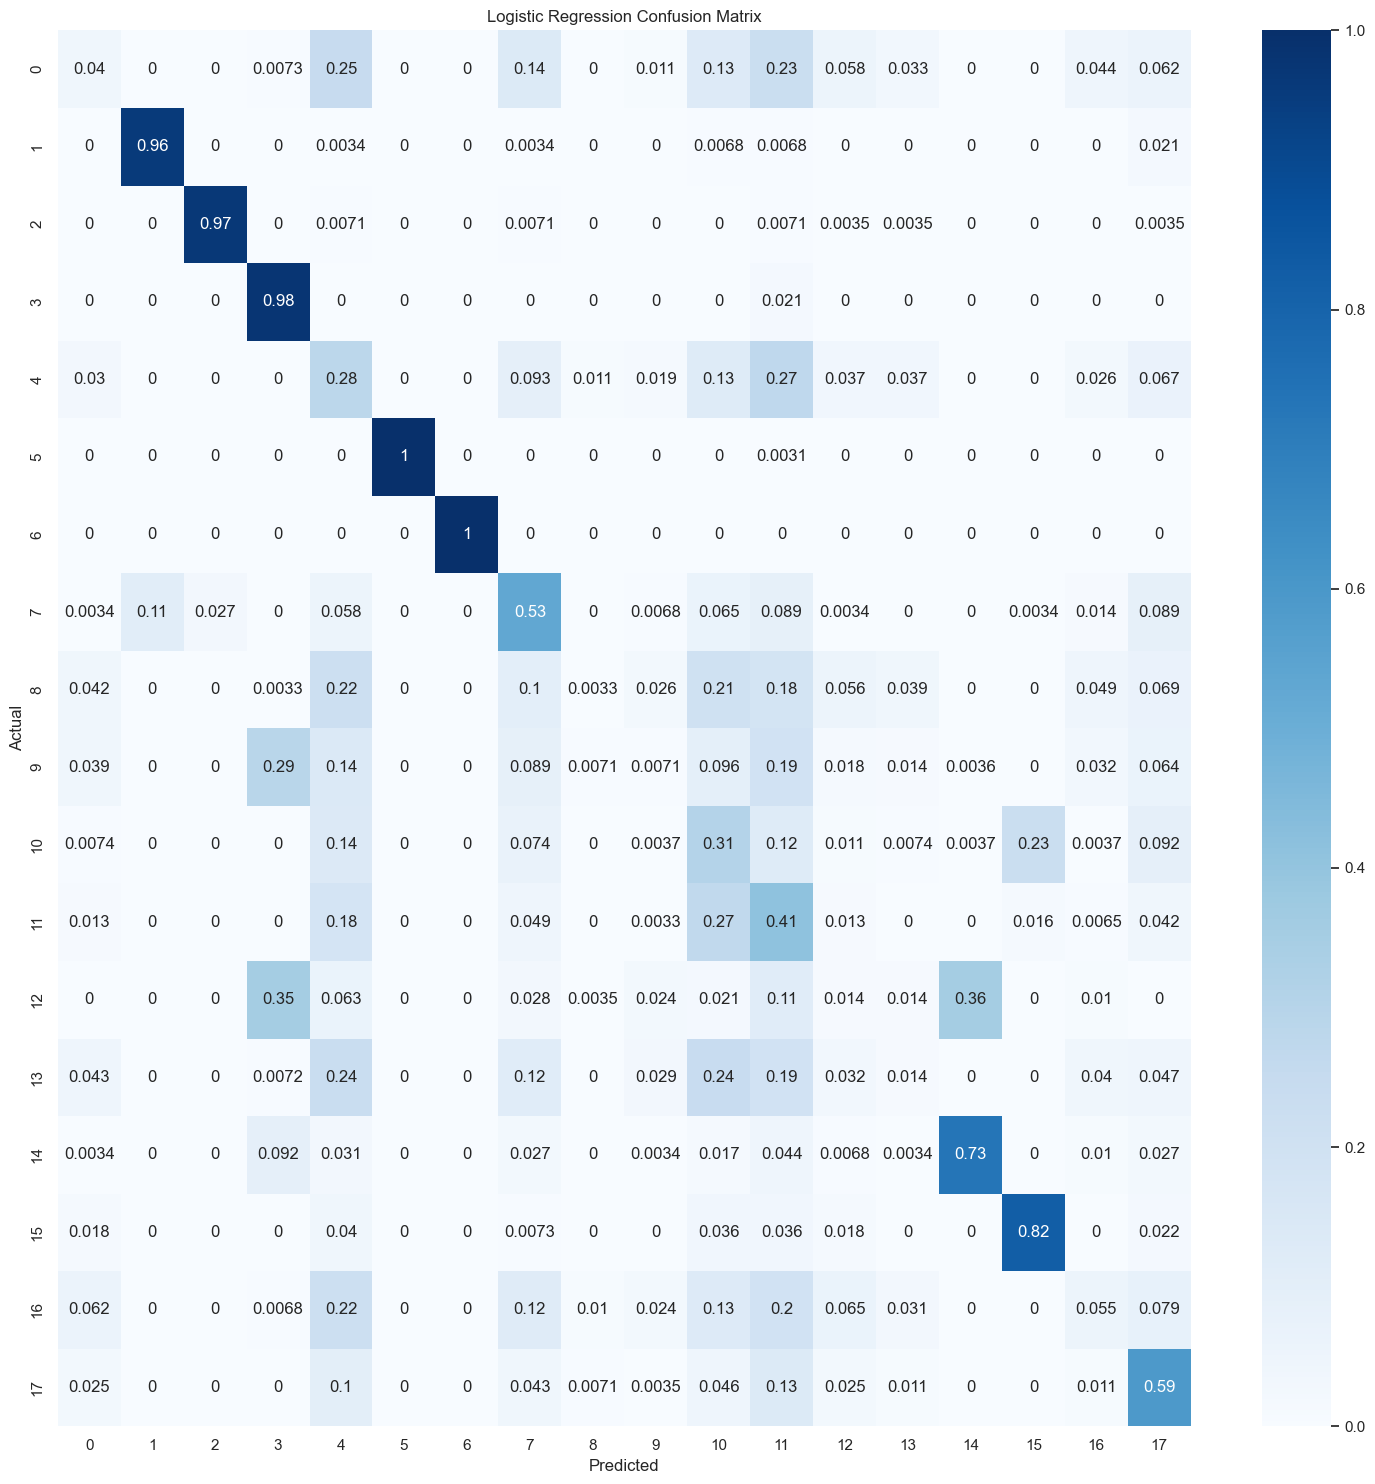

Logistic Regression accuracy_score: 0.48900462962962965


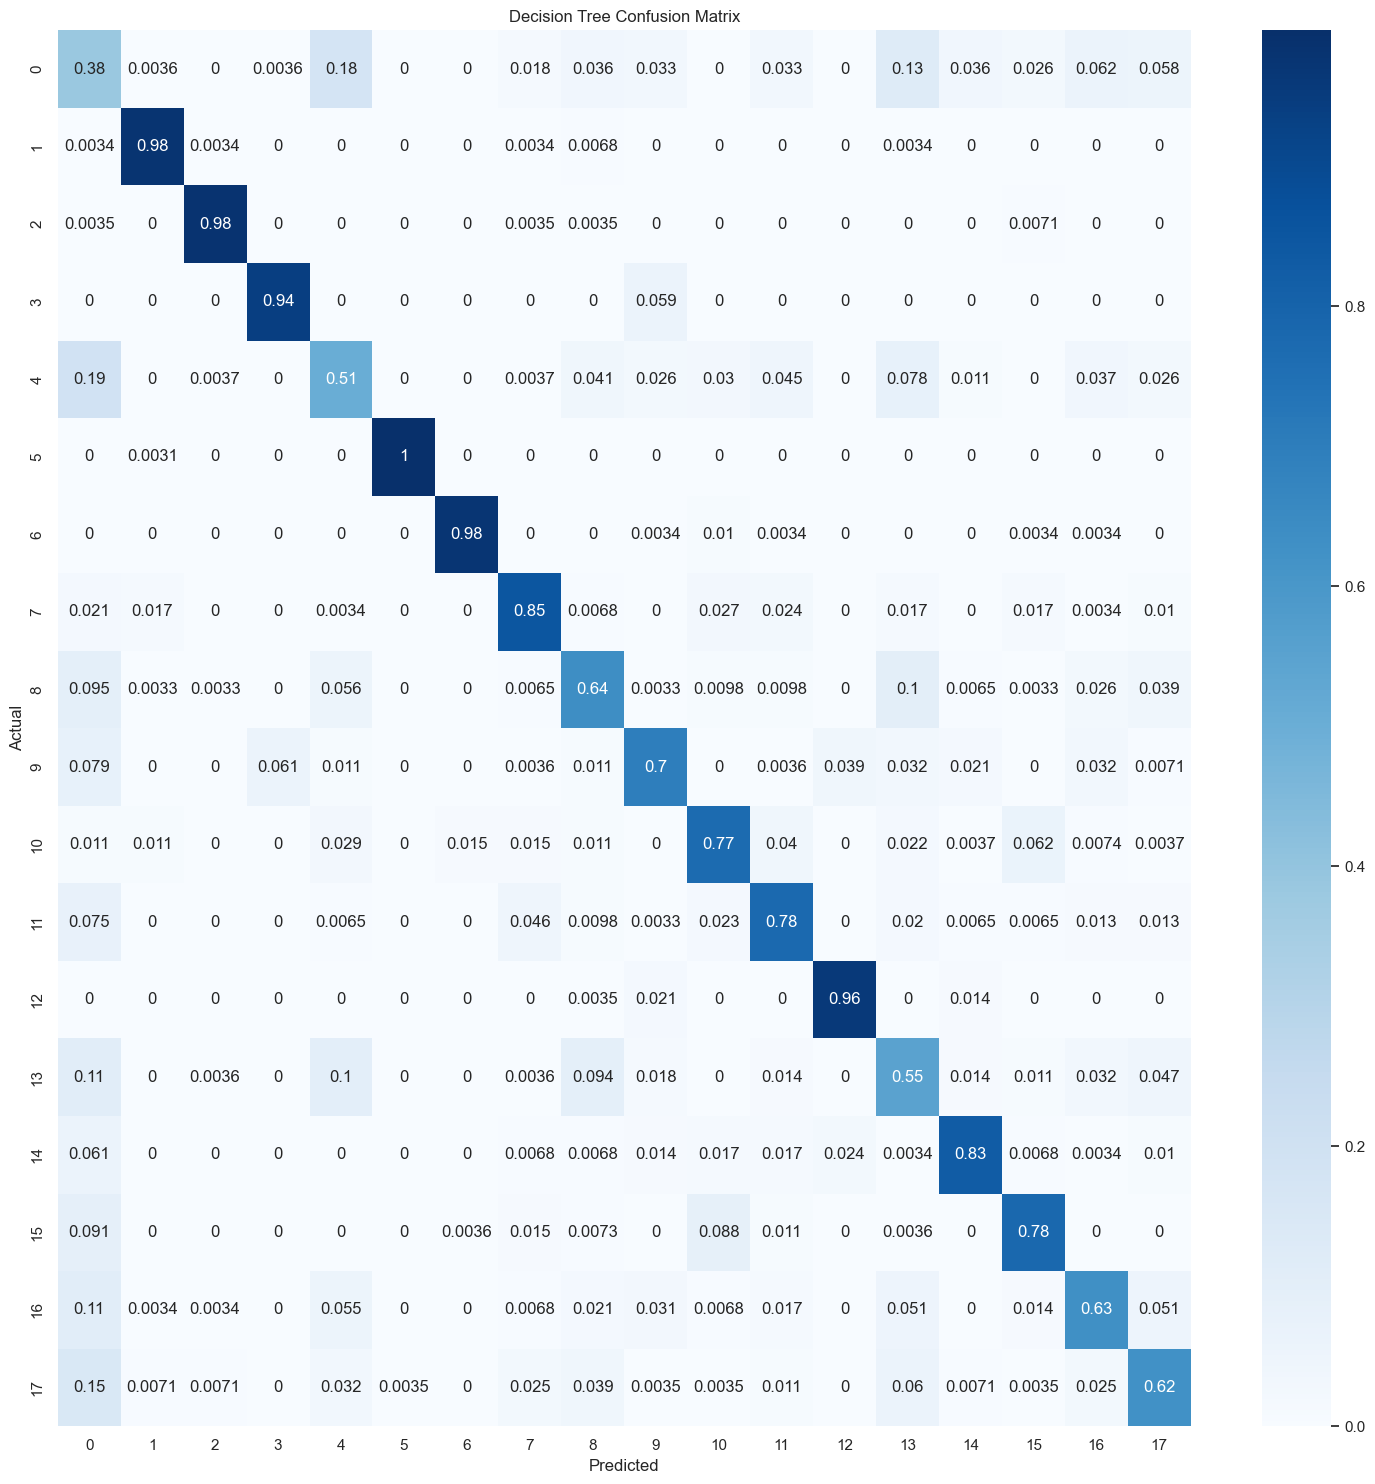

Decision Tree accuracy_score: 0.7748842592592593


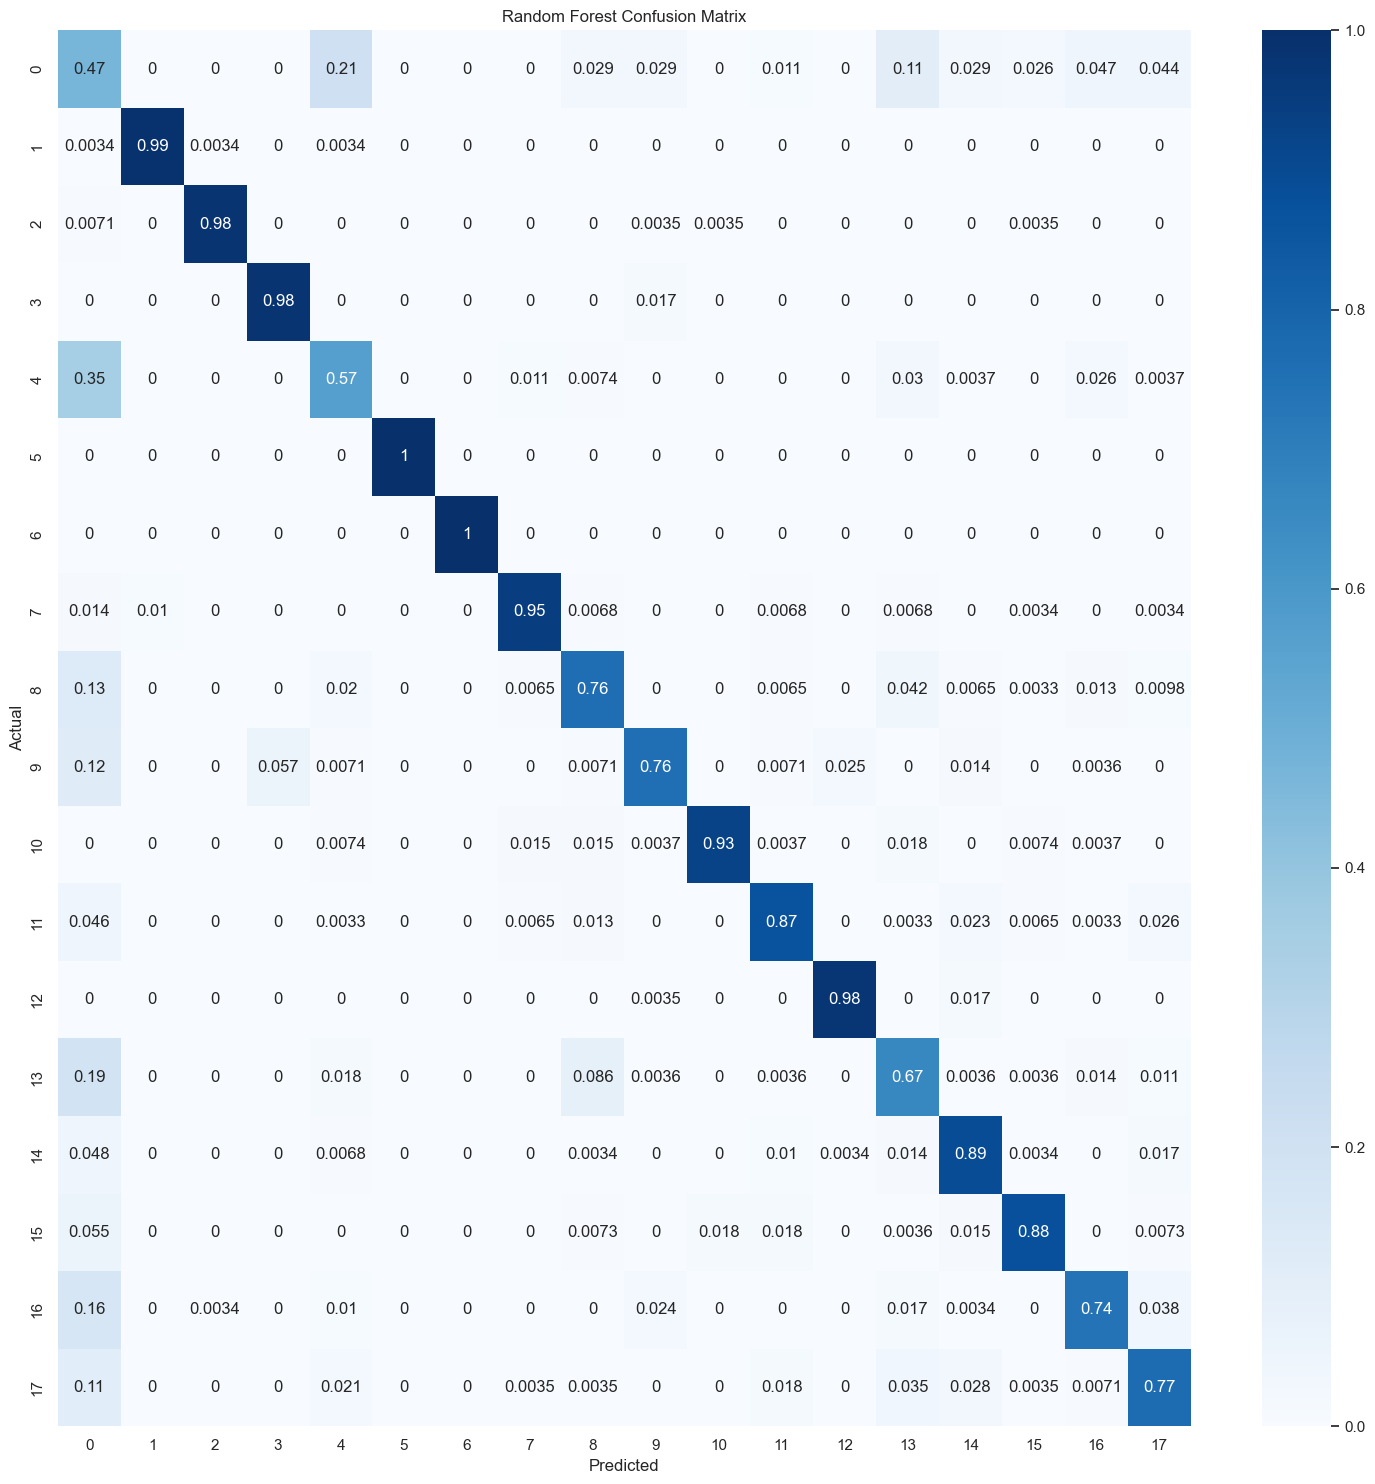

Random Forest accuracy_score: 0.8466435185185185


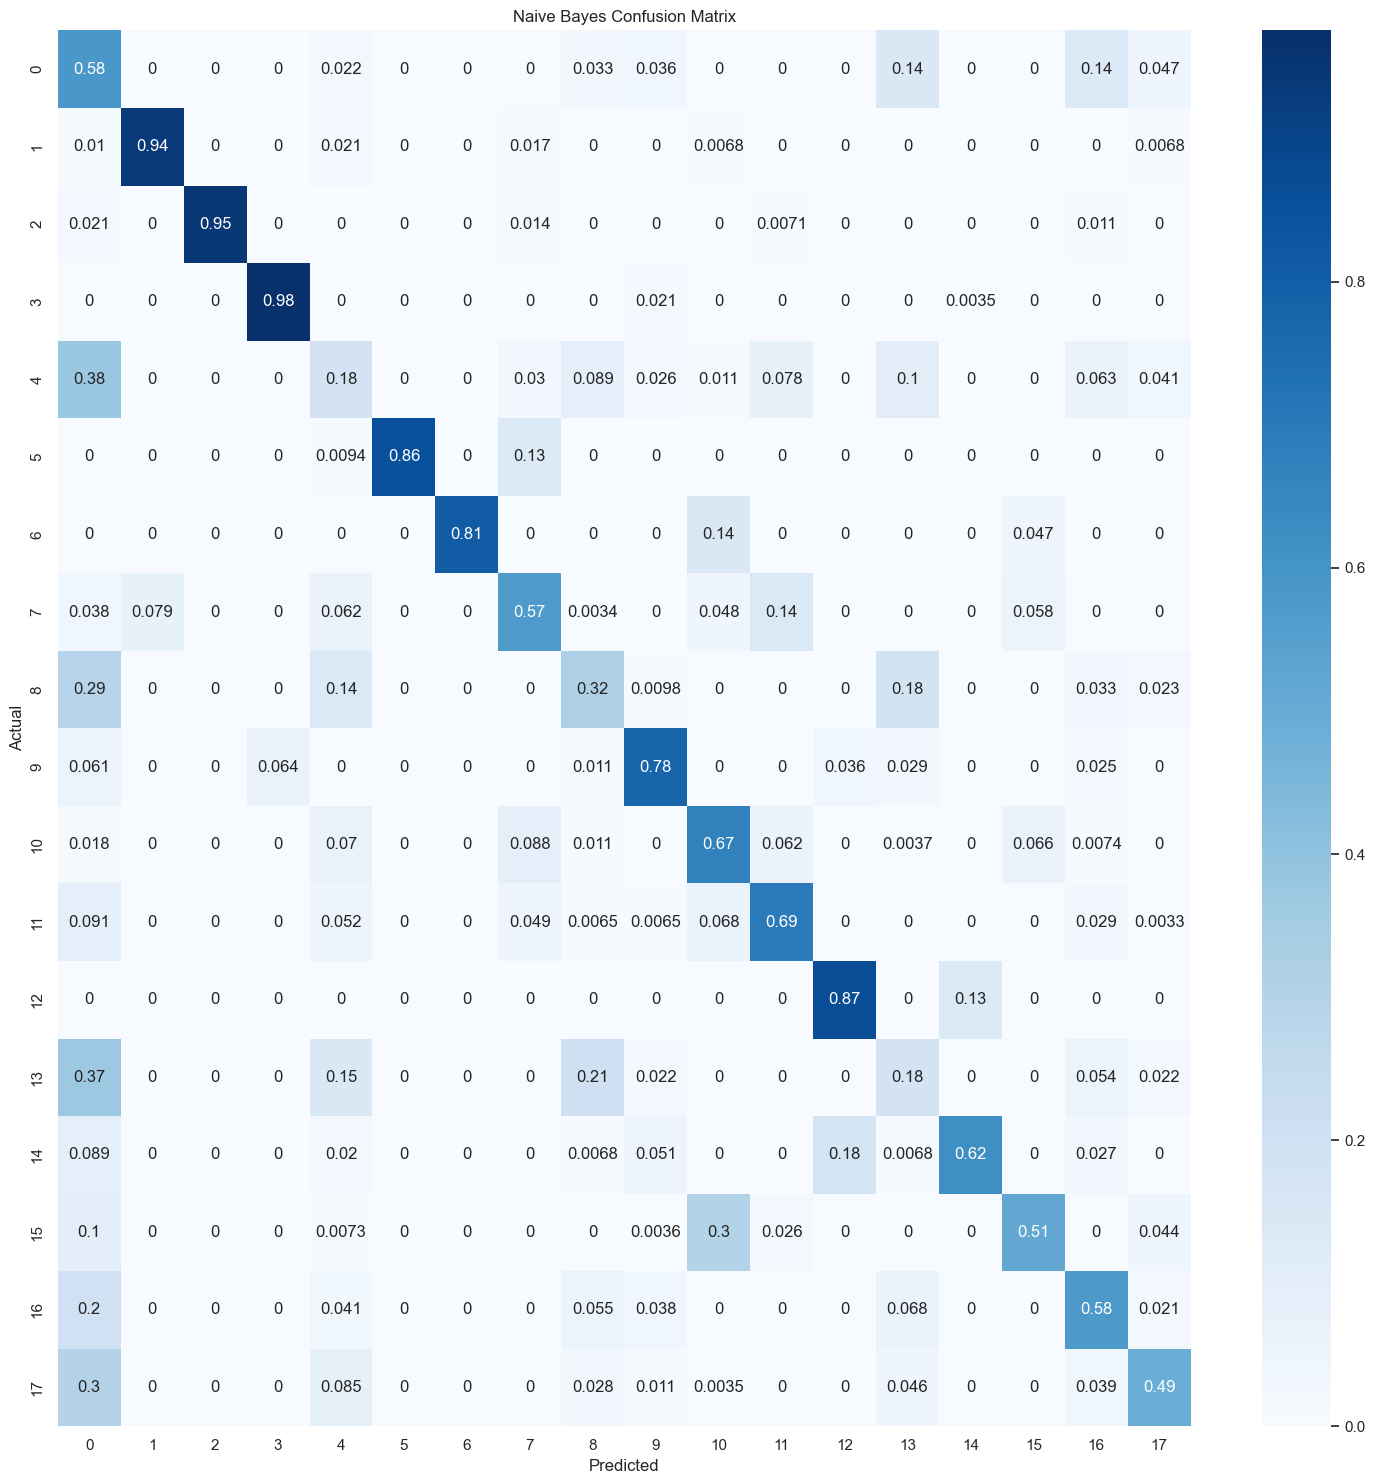

Naive Bayes accuracy_score: 0.6467978395061729


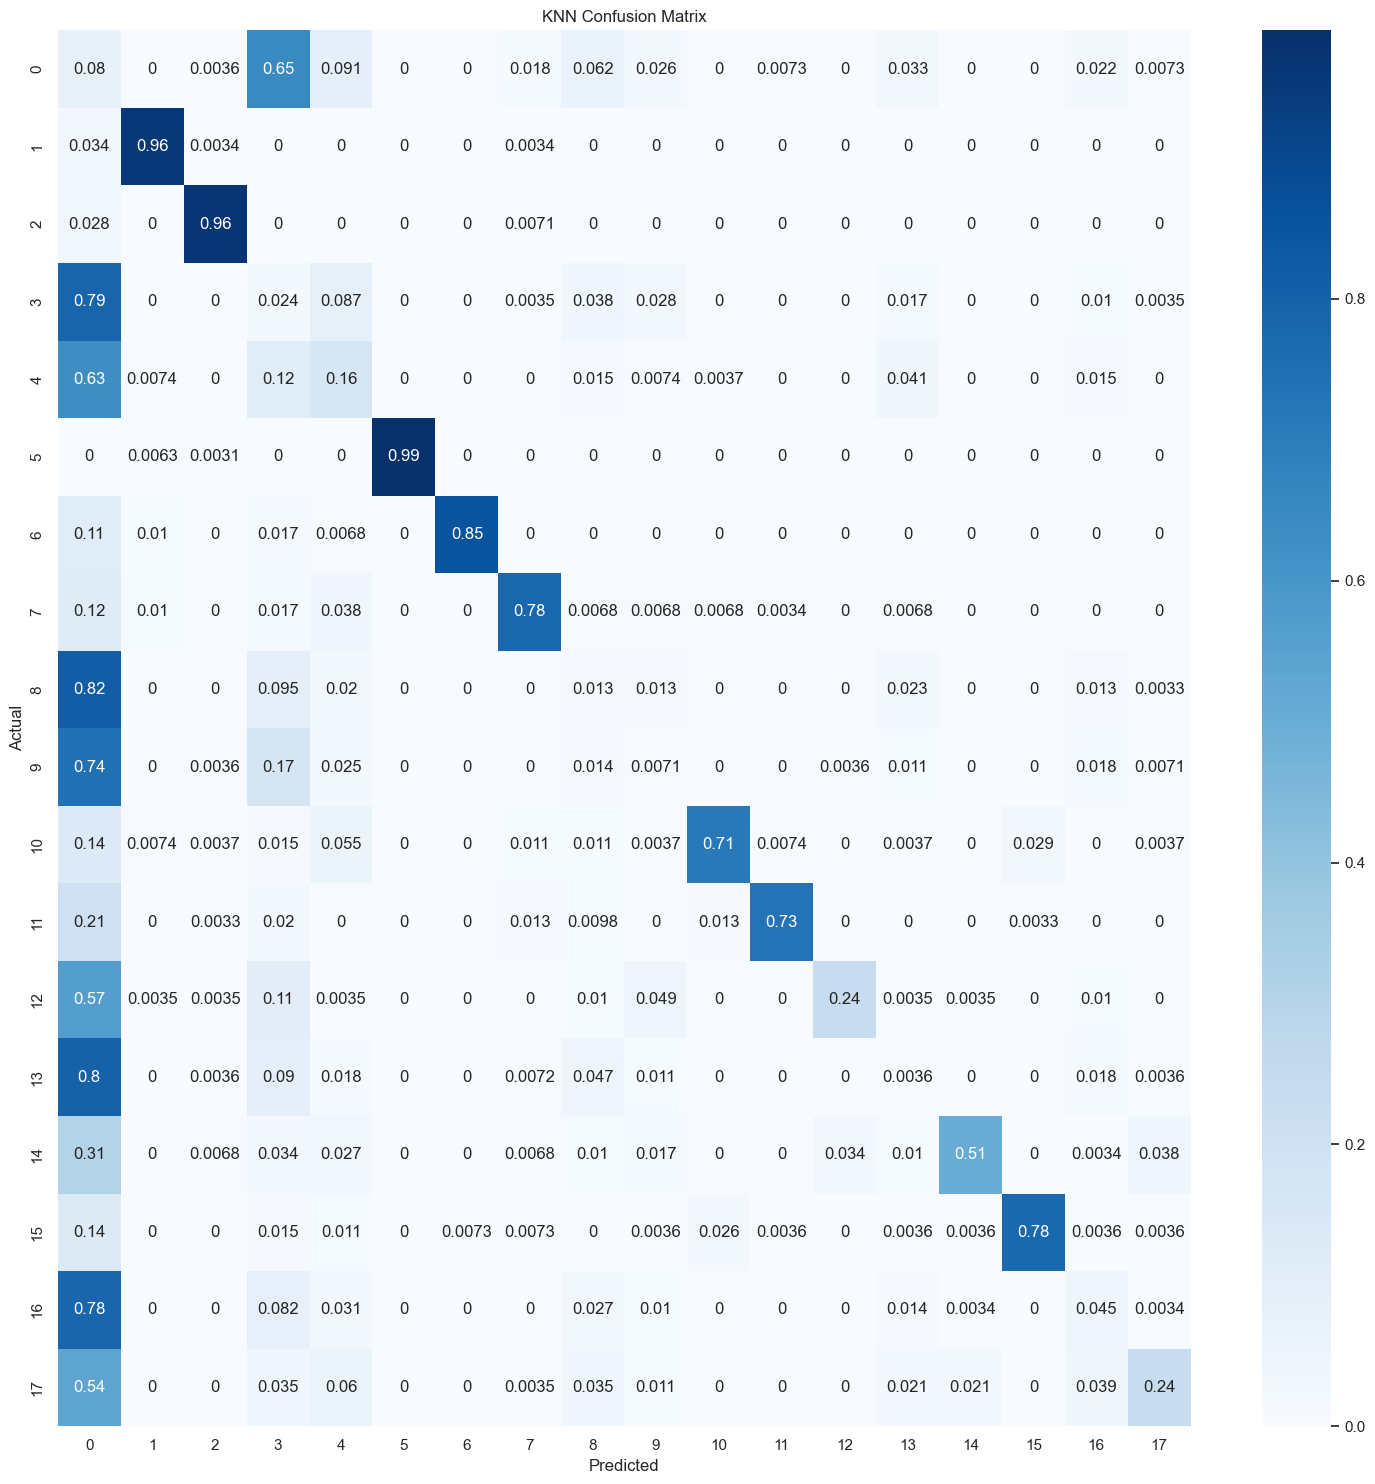

KNN accuracy_score: 0.4546682098765432


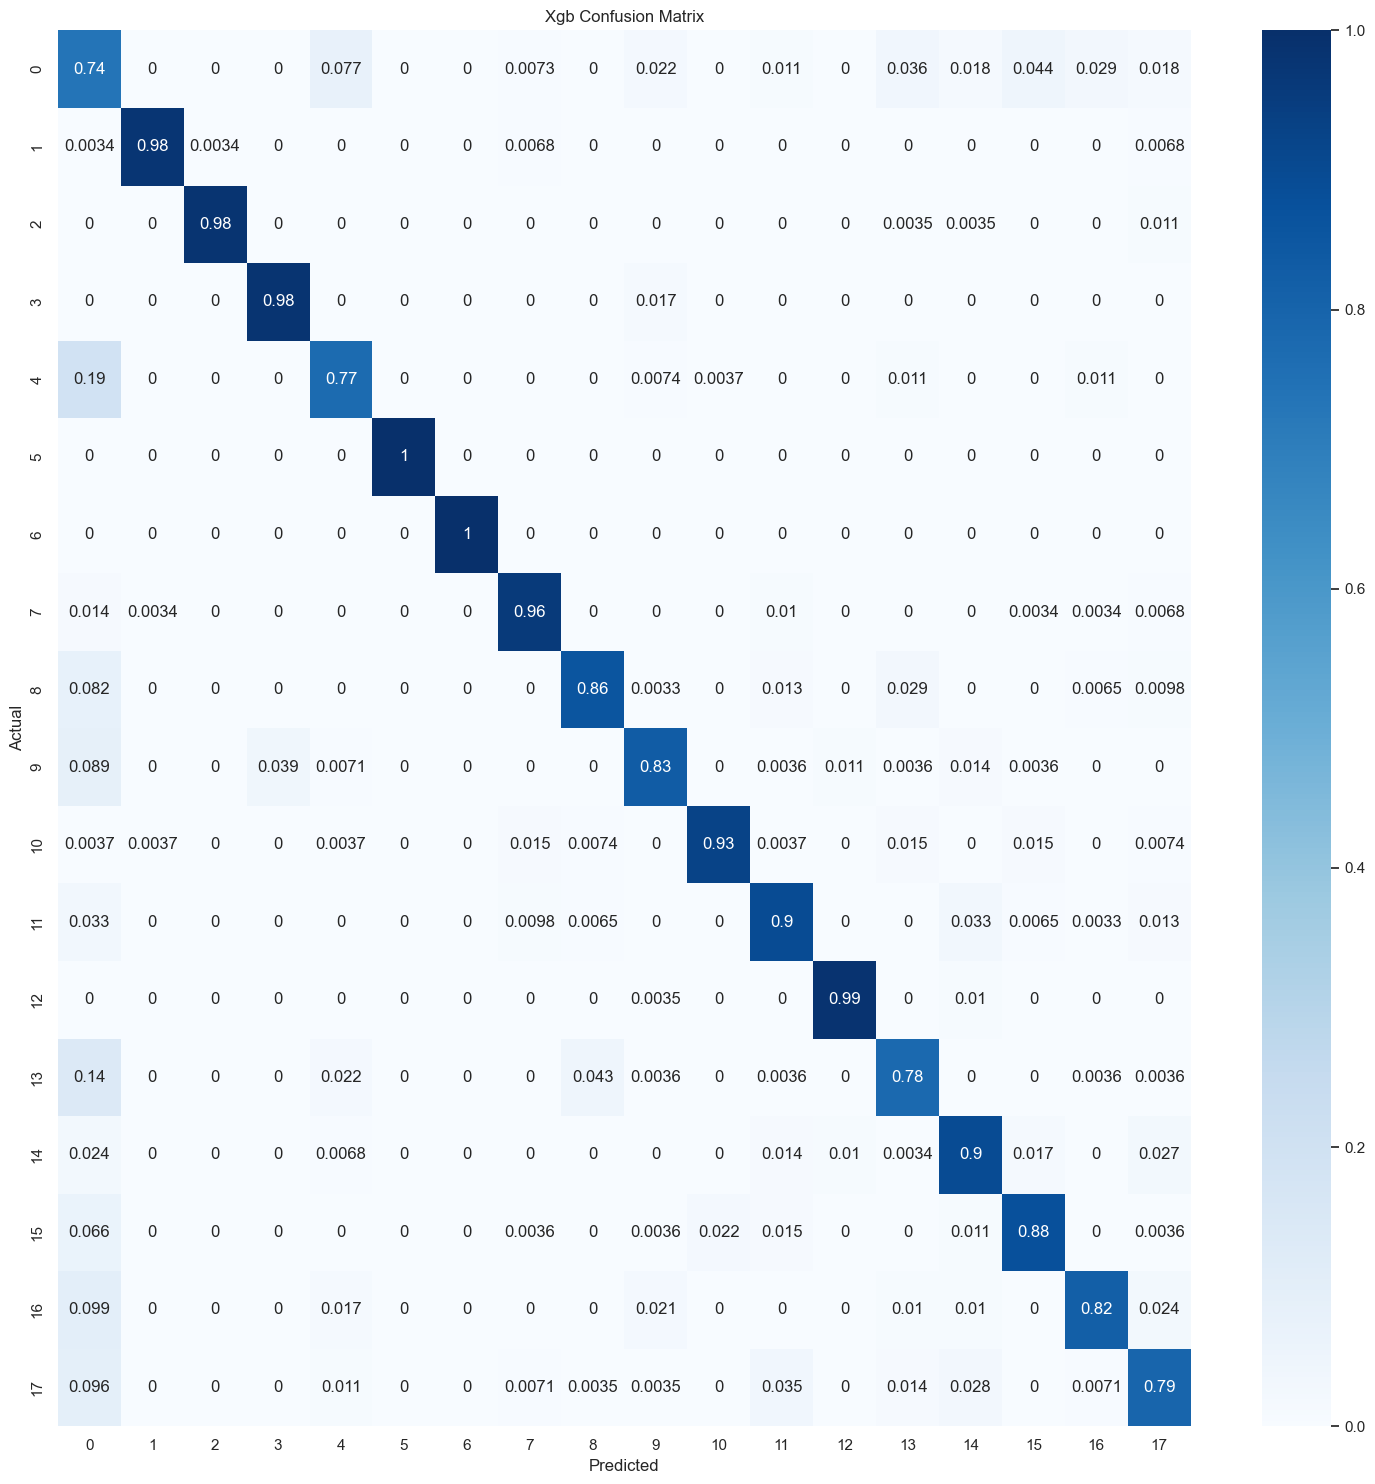

Xgb accuracy_score: 0.8948688271604939


In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression Confusion Matrix')
print("Logistic Regression accuracy_score:", accuracy_score(y_test, y_pred_logreg))

#plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')
#print("SVM accuracy_score:", accuracy_score(y_test, y_pred_svm))

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')
print("Decision Tree accuracy_score:", accuracy_score(y_test, y_pred_dt))

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')
print("Random Forest accuracy_score:", accuracy_score(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')
print("Naive Bayes accuracy_score:", accuracy_score(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')
print("KNN accuracy_score:", accuracy_score(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_xg, 'Xgb Confusion Matrix')
print("Xgb accuracy_score:", accuracy_score(y_test, y_pred_xg))




    

In [36]:
from sklearn.model_selection import GridSearchCV, KFold

In [37]:
 # Define the parameter grid for hyperparameter tuning
param_grid = {
     'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
 }

# 'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 1, 5]    'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.6, 0.8, 1.0]

# Define the cross-validation strategy
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Initialize the grid search object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold, n_jobs=-1,verbose=True)

# Fit the grid search object to the data
grid_result = grid_search.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding score
print(f"Best score: {grid_result.best_score_:.4f}")
print("Best hyperparameters:")
for param, value in grid_result.best_params_.items():
     print(f"{param}: {value}")

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best score: 0.8375
Best hyperparameters:
max_depth: 5
n_estimators: 300


In [38]:
xg = xgb.XGBClassifier(max_depth=5,n_estimators=200)
xg.fit(x_train, y_train)

y_pred_xg = xg.predict(x_test)

In [39]:
print("Xgb accuracy_score:", accuracy_score(y_test, y_pred_xg))

Xgb accuracy_score: 0.8948688271604939


REAL TIME FAULT PREDICTION

In [40]:
for F_num in range(0,21):
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==1)].copy()
    x_new = df_new.iloc[:,3:]
    x_new = sc.transform(x_new)

    y_pred = xg.predict(x_new)
    y_pred = le.inverse_transform(y_pred)
    y_proba = np.max(xg.predict_proba(x_new),axis=1)

    f, ax = plt.subplots(figsize=(10,3))
    sns.scatterplot(x=df_new['sample'],y=y_pred,hue=y_proba,palette="coolwarm",s=80,alpha=0.4)
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- xmeas_13
- xmeas_16
- xmeas_25
- xmeas_29
- xmeas_31
- ...
